In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from env import get_db_url
from sklearn.cluster import KMeans


# Q1 clustering on Iris

In [2]:
query = '''SELECT * FROM measurements m JOIN species s ON m.species_id = s.species_id '''
iris = pd.read_sql(query, get_db_url('iris_db'))

In [3]:
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


## with two features..

In [4]:
X = iris[['petal_width', 'sepal_width']]

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
iris['cluster'] = kmeans.predict(X)

In [7]:
kmeans.cluster_centers_


array([[2.05208333, 3.04166667],
       [0.24489796, 3.45102041],
       [1.30943396, 2.70754717]])

In [8]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


,petal_width,sepal_width
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


In [9]:
iris.groupby('cluster')['petal_width', 'sepal_width'].mean()


,petal_width,sepal_width
cluster,,
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


Text(0.5, 1.0, 'Visualizing Cluster Centers')

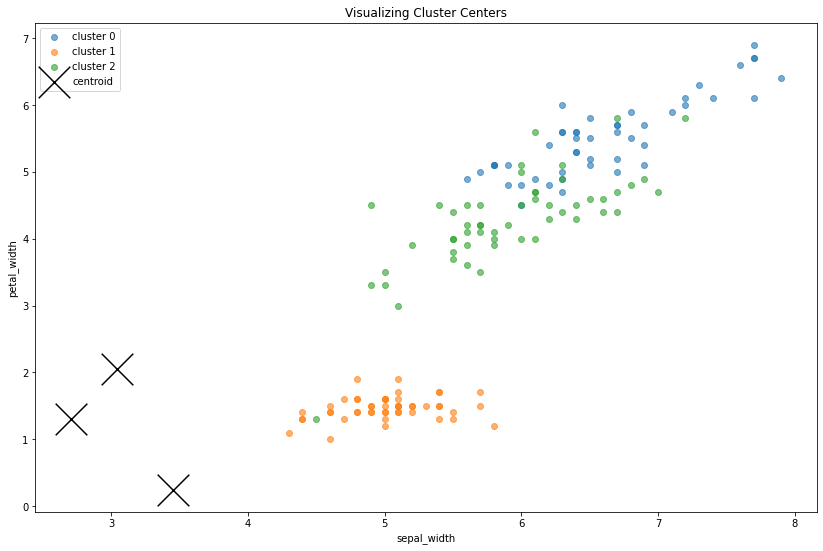

In [10]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers')


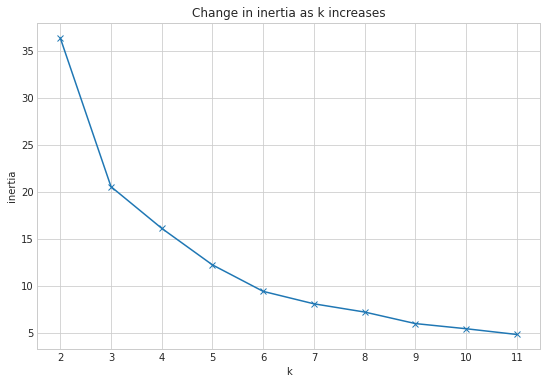

In [11]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


## with three features this time..

In [12]:
Z = iris[['petal_width', 'sepal_width', 'sepal_length']]

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(Z)

KMeans(n_clusters=3)

In [14]:
iris['cluster'] = kmeans.predict(Z)

In [15]:
kmeans.cluster_centers_


array([[0.246     , 3.428     , 5.006     ],
       [1.43148148, 2.6962963 , 5.78518519],
       [1.96304348, 3.07826087, 6.82173913]])

In [16]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=Z.columns)
centroids


,petal_width,sepal_width,sepal_length
0,0.246000,3.428000,5.006000
1,1.431481,2.696296,5.785185
2,1.963043,3.078261,6.821739


In [17]:
iris.groupby('cluster')['petal_width', 'sepal_width', 'sepal_length'].mean()


,petal_width,sepal_width,sepal_length
cluster,,,
0,0.246000,3.428000,5.006000
1,1.431481,2.696296,5.785185
2,1.963043,3.078261,6.821739


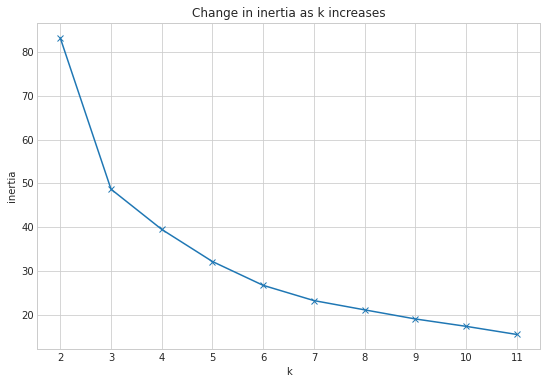

In [18]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(Z).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


# Q2 clustering on mall